In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

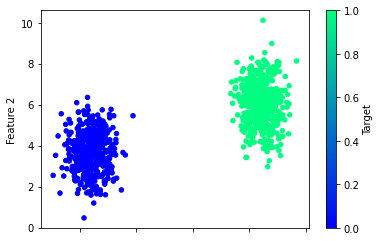

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))


In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1110 - accuracy: 0.0859
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0852 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0184 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0059 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9714 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9614 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9422 - accuracy: 0.0000e+00
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9218 - accuracy: 0.0000e+00
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9043 - accuracy: 0.0000e+00
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8

24/24 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5051
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5146
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4559
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5127
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5244
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5282
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4934
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4831
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4629
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5116
Epoch 92/100


<AxesSubplot:>

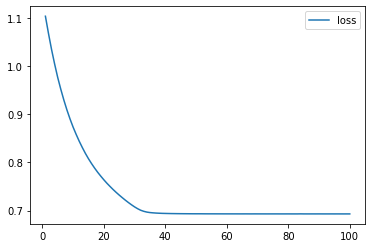

In [13]:
#Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

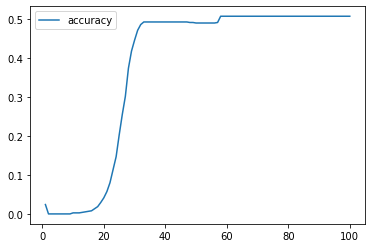

In [14]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


8/8 - 0s - loss: 0.6938 - accuracy: 0.4800
Loss: 0.693791389465332, Accuracy: 0.47999998927116394


In [16]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

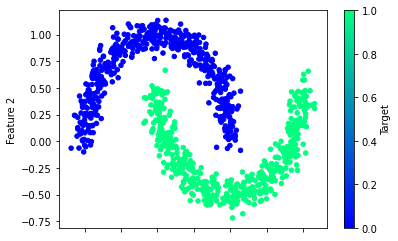

In [18]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5307
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5307
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5307
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5307
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 93/100


<AxesSubplot:>

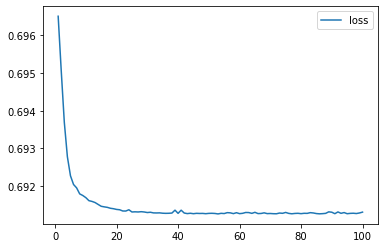

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

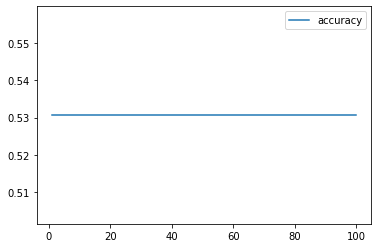

In [22]:
# Plot the loss
history_df.plot(y="accuracy")

In [23]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [24]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.8428
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.8713
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.8646
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.8669
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.8981
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8893
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.8959
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8857
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8699
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8760
Epoch 11/

24/24 [==============================] - 0s 992us/step - loss: 0.2216 - accuracy: 0.8962
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.8975
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1918 - accuracy: 0.9086
Epoch 85/100
24/24 [==============================] - 0s 943us/step - loss: 0.1832 - accuracy: 0.9237
Epoch 86/100
24/24 [==============================] - 0s 941us/step - loss: 0.2162 - accuracy: 0.8932
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1901 - accuracy: 0.9163
Epoch 88/100
24/24 [==============================] - 0s 943us/step - loss: 0.1675 - accuracy: 0.9318
Epoch 89/100
24/24 [==============================] - 0s 941us/step - loss: 0.2246 - accuracy: 0.8851
Epoch 90/100
24/24 [==============================] - 0s 949us/step - loss: 0.2085 - accuracy: 0.8968
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2046 - accuracy: 0.8964
E